<a href="https://colab.research.google.com/github/atharvadate04/Tumor_Classification_using_SVM/blob/main/MRI_Image_classification_using_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [11]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 97% 144M/149M [00:01<00:00, 110MB/s]
100% 149M/149M [00:01<00:00, 112MB/s]


In [ ]:
!unzip /content/brain-tumor-mri-dataset.zip

In [17]:
cd Training/

/root/Training


Cleaning and training starts

In [24]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

dataset_path = '/root/Training'
images = []
labels = []

for folder_name in ['glioma', 'meningioma', 'notumor', 'pituitary']:
    folder_path = os.path.join(dataset_path, folder_name)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)

        img = cv2.imread(img_path)
        img = cv2.resize(img, (128, 128))
        img = img.astype('float32') / 255.0

        images.append(img)
        labels.append(folder_name)

images = np.array(images)
labels = np.array(labels)

In [25]:
le = LabelEncoder()
labels = le.fit_transform(labels)

In [26]:
images = images.reshape((images.shape[0], -1))

In [27]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [28]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [29]:
y_pred = model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%')
print(classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 87.31%
              precision    recall  f1-score   support

      glioma       0.83      0.88      0.85       288
  meningioma       0.78      0.71      0.74       265
     notumor       0.95      0.90      0.93       291
   pituitary       0.92      0.99      0.95       299

    accuracy                           0.87      1143
   macro avg       0.87      0.87      0.87      1143
weighted avg       0.87      0.87      0.87      1143



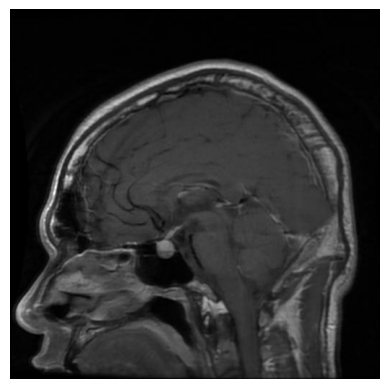

Predicted Label: pituitary


In [39]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

path = '/root/Testing/pituitary/Te-piTr_0006.jpg'
img = mpimg.imread(path)
plt.imshow(img)
plt.axis('off')
plt.show()
new_image = cv2.imread(path)
new_image = cv2.resize(new_image, (128, 128))
new_image = new_image.astype('float32') / 255.0
new_image = new_image.flatten().reshape(1, -1)

prediction = model.predict(new_image)
predicted_label = le.inverse_transform(prediction)
print(f'Predicted Label: {predicted_label[0]}')

In [35]:
from joblib import dump, load
dump(model, '/root/svm_model.joblib')

['/root/svm_model.joblib']